In [11]:
import numpy as np
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from sklearn.decomposition import PCA
import time
import random

In [12]:
data_name = ["./vb_data.npy", "./md1_data.npy", "./md2_data.npy",
             "./cp_data.npy"]

test_loss=[]
train_loss=[]
test_acc=[]
train_acc=[]
test_auc=[]
train_auc=[]
epoch_num = 500
T = 0

for i in range(4):
    X_test=np.load(data_name[i])
    m1=np.load(data_name[(i + 1) % 4])
    m2=np.load(data_name[(i + 2) % 4])
    m3=np.load(data_name[(i + 3) % 4])
    X_train=np.vstack((m1,m2,m3))

    for j in range(1000):
        n = random.randint(0, len(X_train) - 1)
        m = random.randint(0, len(X_train[0]) - 1)
        X_train[n][m] = 0.5

    y_train=X_train[:,-1]
    X_train=X_train[:,:-1]
    y_test=X_test[:,-1]
    X_test=X_test[:,:-1]

    k = 144
    # U,sigma,VT = np.linalg.svd(X_train)
    # sigma = [x * x for x in sigma]
    # sigma_sum = sum(sigma)
    # percentage = 0.99
    # k = 1
    # s = 0
    # while k <= len(sigma):
    #     s += sigma[k - 1]
    #     if s > sigma_sum * percentage:
    #         break
    #     k += 1
    # pca = PCA(n_components = k)
    # pca.fit(X_train)
    # X_train = pca.transform(X_train)
    # X_test = pca.transform(X_test)

    X_test_list=[]
    y_test_list=[]
    one_hot_train_labels = to_categorical(y_train)
    one_hot_test_labels = to_categorical(y_test)
    X_test_list.append(X_test)
    y_test_list.append(one_hot_test_labels)

    T1 = time.process_time()

    model = models.Sequential()
    model.add(layers.Dense(300, activation='relu', input_shape=(k,)))
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(5, activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])
    history = model.fit(X_train, one_hot_train_labels, epochs=epoch_num, batch_size=64, validation_data=(X_test, one_hot_test_labels))

    T2 = time.process_time()

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_loss.append(loss)
    test_loss.append(val_loss)
    train_acc_1=history.history['accuracy']
    val_acc = history.history['val_accuracy']
    test_acc.append(val_acc)
    train_acc.append(train_acc_1)
    a=history.history['auc']
    b=history.history['val_auc']
    test_auc.append(b)
    train_auc.append(a)

    T = T + (T2 - T1)

Epoch 1/500
52/52 [==============================] - 1s 8ms/step - loss: 1.3495 - accuracy: 0.4389 - auc: 0.7540 - val_loss: 1.1907 - val_accuracy: 0.5262 - val_auc: 0.8388
Epoch 2/500
52/52 [==============================] - 0s 3ms/step - loss: 1.1512 - accuracy: 0.5072 - auc: 0.8307 - val_loss: 1.0819 - val_accuracy: 0.5785 - val_auc: 0.8626
Epoch 3/500
52/52 [==============================] - 0s 3ms/step - loss: 1.0823 - accuracy: 0.5364 - auc: 0.8481 - val_loss: 1.0476 - val_accuracy: 0.5505 - val_auc: 0.8562
Epoch 4/500
52/52 [==============================] - 0s 3ms/step - loss: 1.0435 - accuracy: 0.5551 - auc: 0.8590 - val_loss: 0.9714 - val_accuracy: 0.5866 - val_auc: 0.8795
Epoch 5/500
52/52 [==============================] - 0s 3ms/step - loss: 1.0031 - accuracy: 0.5620 - auc: 0.8694 - val_loss: 0.9700 - val_accuracy: 0.5957 - val_auc: 0.8792
Epoch 6/500
52/52 [==============================] - 0s 3ms/step - loss: 0.9632 - accuracy: 0.5866 - auc: 0.8802 - val_loss: 0.9648 - v

Testing Auc: 0.9967314153909683
Testing Accuracy: 0.9731498062610626
Testing Loss: 0.12428470514714718
Running Time: 56.890625 seconds


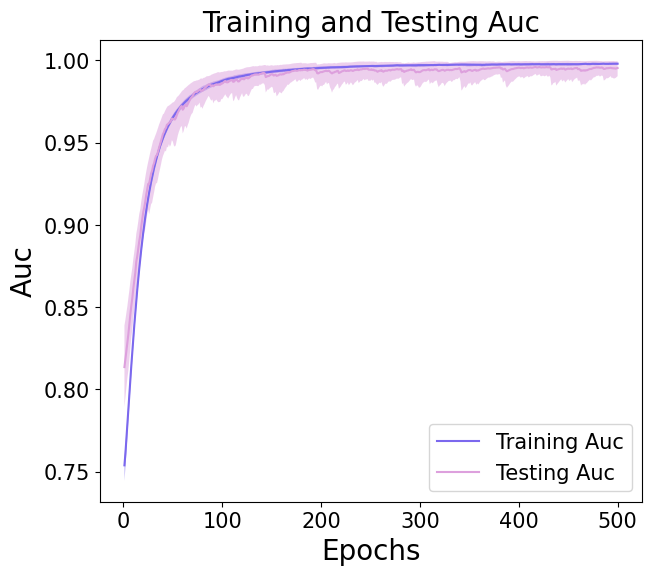

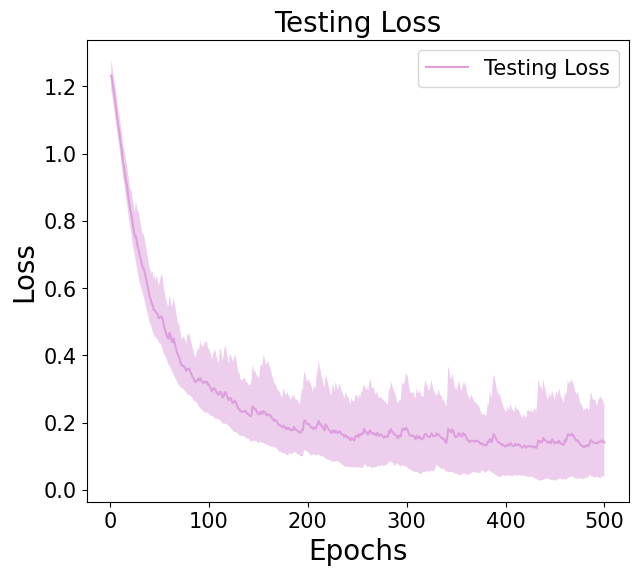

In [13]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

epochs = range(1, epoch_num + 1)
train_auc_min=[]
train_auc_max=[]
train_auc_mean=[]
for i in range(0, epoch_num):
    maxv=max(train_auc[0][i],train_auc[1][i],train_auc[2][i],train_auc[3][i])
    minv=min(train_auc[0][i],train_auc[1][i],train_auc[2][i],train_auc[3][i])
    meanv=(train_auc[0][i]+train_auc[1][i]+train_auc[2][i]+train_auc[3][i]) /4
    train_auc_min.append(minv)
    train_auc_max.append(maxv)
    train_auc_mean.append(meanv)

test_auc_min=[]
test_auc_max=[]
test_auc_mean=[]
for i in range(0, epoch_num):
    maxv=max(test_auc[0][i],test_auc[1][i],test_auc[2][i],test_auc[3][i])
    minv=min(test_auc[0][i],test_auc[1][i],test_auc[2][i],test_auc[3][i])
    meanv=(test_auc[0][i]+test_auc[1][i]+test_auc[2][i]+test_auc[3][i]) /4
    test_auc_min.append(minv)
    test_auc_max.append(maxv)
    test_auc_mean.append(meanv)

test_loss_min=[]
test_loss_max=[]
test_loss_mean=[]
for i in range(0, epoch_num):
    maxv=max(test_loss[0][i],test_loss[1][i],test_loss[2][i],test_loss[3][i])
    minv=min(test_loss[0][i],test_loss[1][i],test_loss[2][i],test_loss[3][i])
    meanv=(test_loss[0][i]+test_loss[1][i]+test_loss[2][i]+test_loss[3][i]) /4
    test_loss_min.append(minv)
    test_loss_max.append(maxv)
    test_loss_mean.append(meanv)

w = np.array([test_auc[0][epoch_num - 1],test_auc[1][epoch_num - 1],test_auc[2][epoch_num - 1],test_auc[3][epoch_num - 1]])
s=np.std(w)
meanv=np.mean(w)
wloss = np.array([test_loss[0][epoch_num - 1],test_loss[1][epoch_num - 1],test_loss[2][epoch_num - 1],test_loss[3][epoch_num - 1]])
meanvloss = np.mean(wloss)
wacu = np.array([test_acc[0][epoch_num - 1],test_acc[1][epoch_num - 1],test_acc[2][epoch_num - 1],test_acc[3][epoch_num - 1]])
meanvacu = np.mean(wacu)
print("Testing Auc:", meanv)
print("Testing Accuracy:", meanvacu)
print("Testing Loss:", meanvloss)
print("Running Time:", T, "seconds")

f=plt.figure(figsize=[7,6])
plt.plot(epochs, smooth_curve(train_auc_mean), color='mediumslateblue',label='Training Auc')
plt.fill_between(epochs, smooth_curve(train_auc_min), smooth_curve(train_auc_max), alpha=0.5, facecolor='mediumslateblue')
plt.plot(epochs, smooth_curve(test_auc_mean), color='plum',label='Testing Auc')
plt.fill_between(epochs, smooth_curve(test_auc_min), smooth_curve(test_auc_max), alpha=0.5, facecolor='plum')
plt.title('Training and Testing Auc',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Auc',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc = 4,fontsize=15)
plt.savefig('./DNN_Auc_05.png', dpi=600)
plt.show()

g=plt.figure(figsize=[7,6])
plt.plot(epochs, smooth_curve(test_loss_mean), color='plum',label='Testing Loss')
plt.fill_between(epochs, smooth_curve(test_loss_min), smooth_curve(test_loss_max), alpha=0.5, facecolor='plum')
plt.title('Testing Loss',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc = 1, fontsize=15)
plt.savefig('./DNN_Loss_05.png', dpi=600)
plt.show()

In [14]:
X_test=np.load(data_name[0])
m1=np.load(data_name[1])
m2=np.load(data_name[2])
m3=np.load(data_name[3])
X_train=np.vstack((m1,m2,m3))

y_train=X_train[:,-1]
X_train=X_train[:,:-1]
y_test=X_test[:,-1]
X_test=X_test[:,:-1]

c = np.mean(X_train)
print(c)
for j in range(100):
    n = random.randint(0, len(X_train) - 1)
    m = random.randint(0, len(X_train[0]) - 1)
    print(np.mean(X_train[:,m]))
    X_train[n][m] = 0.5


0.507525158503491
0.5000134296028881
0.5005803700361011
0.8213884132370637
0.5001466185318894
0.1981792295126354
0.5082785457280385
0.5316420818291215
0.5145149045336943
0.4965016636582431
0.49968839651022867
0.9778098495788208
0.40482653865824303
0.4231744193742479
0.49917870336943443
0.5065591576413959
0.4999689711191335
0.4995622924187726
0.34461509566787
0.5033968682310469
0.8212379920577617
0.49928935619735254
0.7053428369434416
0.4998007099879663
0.500204635980746
0.4996482851985559
0.9787613357400723
0.4891973054753309
0.5045840884476535
0.423196046931408
0.5146287996389892
0.5003293802647413
0.4889312665463298
0.4991167900120337
0.5897386010830326
0.5002022653429603
0.4999636432009627
0.40481268787605296
0.0065200760228640185
0.49995274858604094
0.49410020457280385
0.4940962545126354
0.3223284606197353
0.5044436010830325
0.5000340342960289
0.4952363387484958
0.49751645306859205
0.5006079151624548
0.4999835198555957
0.49411108303249096
0.026728484768351386
0.5003860348977136
0.5

In [15]:
U,sigma,VT = np.linalg.svd(X_train)
print("Singular Value of Training Data Coupling Matirx")
k = 1
for i in sigma:
    print('%.3f' %i, end="  ")
    if (k%6 == 0):
        print("")
    k+=1
sigma = [x * x for x in sigma]
percentage = 0.99
sigma_sum = sum(sigma)
k = 1
s = 0
while k <= len(sigma):
    s += sigma[k - 1]
    if s > sigma_sum * percentage:
        break
    k += 1
print(k)


Singular Value of Training Data Coupling Matirx
360.630  30.128  19.382  16.658  14.054  9.538  
9.145  8.704  8.386  5.582  5.400  4.922  
4.725  4.273  3.949  3.578  3.228  3.191  
3.112  2.850  2.598  2.559  2.421  2.239  
2.161  1.959  1.933  1.827  1.752  1.718  
1.691  1.629  1.517  1.466  1.393  1.365  
1.334  1.317  1.273  1.231  1.209  1.180  
1.131  1.066  1.052  1.031  1.019  0.988  
0.926  0.876  0.858  0.808  0.802  0.732  
0.679  0.661  0.630  0.623  0.582  0.554  
0.528  0.502  0.488  0.451  0.435  0.418  
0.403  0.385  0.374  0.364  0.347  0.340  
0.317  0.307  0.290  0.278  0.260  0.250  
0.241  0.236  0.227  0.221  0.216  0.213  
0.207  0.202  0.197  0.191  0.188  0.183  
0.175  0.173  0.163  0.156  0.154  0.148  
0.146  0.145  0.143  0.140  0.138  0.132  
0.128  0.127  0.124  0.123  0.121  0.115  
0.111  0.108  0.102  0.099  0.095  0.092  
0.088  0.086  0.082  0.079  0.078  0.074  
0.072  0.070  0.068  0.065  0.062  0.060  
0.054  0.052  0.051  0.050  0.049  0.046  


In [16]:
U,sigma,VT = np.linalg.svd(m2)
for i in sigma:
    print('%.3f' %i)

217.691
36.128
17.535
11.402
9.644
8.254
5.450
5.386
4.698
4.495
3.070
2.921
2.748
2.616
2.469
2.199
1.918
1.903
1.841
1.694
1.550
1.521
1.436
1.365
1.269
1.178
1.133
1.085
1.049
0.985
0.927
0.905
0.880
0.855
0.838
0.774
0.749
0.730
0.703
0.692
0.627
0.612
0.599
0.574
0.567
0.547
0.525
0.516
0.478
0.428
0.412
0.387
0.373
0.369
0.326
0.308
0.287
0.269
0.261
0.258
0.247
0.226
0.220
0.211
0.208
0.202
0.190
0.187
0.177
0.171
0.160
0.154
0.152
0.143
0.140
0.133
0.127
0.123
0.120
0.119
0.113
0.109
0.107
0.105
0.102
0.098
0.095
0.094
0.093
0.089
0.087
0.087
0.085
0.083
0.082
0.079
0.078
0.075
0.074
0.072
0.069
0.067
0.065
0.064
0.062
0.060
0.057
0.056
0.055
0.054
0.052
0.051
0.050
0.046
0.045
0.044
0.042
0.040
0.039
0.038
0.036
0.035
0.033
0.033
0.030
0.029
0.029
0.028
0.028
0.026
0.025
0.024
0.023
0.021
0.019
0.017
0.015
0.013
0.011
0.011
0.010
0.008
0.006
0.005
0.005


In [17]:
U,sigma,VT = np.linalg.svd(m3)
for i in sigma:
    print('%.3f' %i)

218.628
35.974
17.330
10.954
9.404
8.357
5.568
5.444
5.095
5.003
3.378
3.137
2.888
2.606
2.357
2.204
1.978
1.832
1.826
1.746
1.679
1.461
1.398
1.319
1.245
1.158
1.144
1.114
1.060
0.991
0.965
0.924
0.867
0.808
0.777
0.768
0.726
0.707
0.701
0.688
0.651
0.631
0.606
0.589
0.563
0.531
0.496
0.475
0.457
0.437
0.423
0.404
0.379
0.350
0.337
0.316
0.289
0.280
0.266
0.247
0.240
0.230
0.222
0.209
0.204
0.200
0.191
0.189
0.183
0.174
0.170
0.168
0.159
0.152
0.148
0.142
0.138
0.132
0.123
0.122
0.118
0.116
0.115
0.113
0.107
0.106
0.101
0.099
0.094
0.093
0.090
0.088
0.084
0.081
0.081
0.079
0.077
0.075
0.072
0.071
0.070
0.068
0.066
0.063
0.062
0.061
0.059
0.057
0.056
0.054
0.050
0.047
0.047
0.045
0.043
0.042
0.040
0.039
0.038
0.036
0.035
0.035
0.034
0.031
0.031
0.030
0.027
0.027
0.026
0.025
0.024
0.023
0.022
0.021
0.019
0.018
0.014
0.012
0.011
0.011
0.010
0.008
0.006
0.006
0.003
